In [1]:
# Set the image size
image_size = (224, 224)

from keras.applications.vgg16 import VGG16
# Load the VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

In [2]:
import os
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import numpy as np
from keras.applications.vgg16 import preprocess_input

# Extract features from images
X = []
y = []
dataset_dir = 'C:/Users/Hamad/Desktop/DataScience and AI 6 Months Mentorship/PRODIGY_ML/Prodigy_ML_03/train/train'

dog_count = 0
cat_count = 0
max_per_class = 150
total_count = 0

for file in os.listdir(dataset_dir):
    if file.endswith('.jpg'):
        label = file.split('.')[0]
        if (label == 'dog' and dog_count < max_per_class) or (label == 'cat' and cat_count < max_per_class):
            if label == 'dog':
                y.append(1)
                dog_count += 1
            else:
                y.append(0)
                cat_count += 1
            
            image = load_img(os.path.join(dataset_dir, file), target_size=image_size)
            image = img_to_array(image)
            image = np.expand_dims(image, axis=0)
            image = preprocess_input(image)
            features = vgg_model.predict(image)
            features = features.flatten()
            X.append(features)
            
            total_count += 1
            if total_count % 10 == 0:
                print(f"{total_count} images processed")
        
        if dog_count >= max_per_class and cat_count >= max_per_class:
            break

X = np.array(X)
y = np.array(y)

# Ensure X and y have data
if len(X) == 0 or len(y) == 0:
    raise ValueError("No data found in X or y. Please check your dataset directory and image loading process.")

print(f"Number of samples in X: {len(X)}")
print(f"Number of labels in y: {len(y)}")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print(f"Number of dog images: {dog_count}")
print(f"Number of cat images: {cat_count}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 928ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 764ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
10 images processed
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
20 images processed
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , r2_score

# Check if X and y are not empty
if len(X) > 0 and len(y) > 0:
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create an SVM classifier
    svm = SVC(kernel='linear', random_state=42)

    # Train the classifier
    svm.fit(X_train, y_train)

    # Predict labels for the test set
    y_pred = svm.predict(X_test)
    print(X_test.shape)
    # Calculate the accuracy  
    accuracy = accuracy_score(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('Accuracy:', accuracy)
    print('R2 Score:', r2)
else:
    print("Error: The dataset is empty. Please ensure that X and y contain data before splitting.")

(60, 25088)
Accuracy: 0.95
R2 Score: 0.7997775305895439


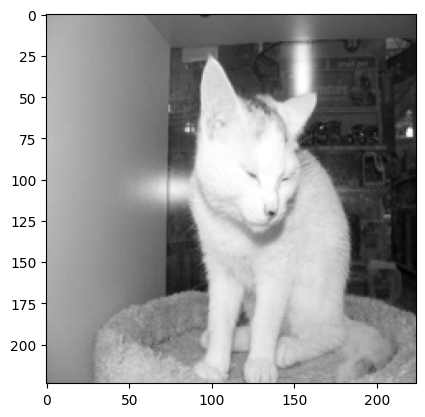

(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step
The image is predicted to be a cat.


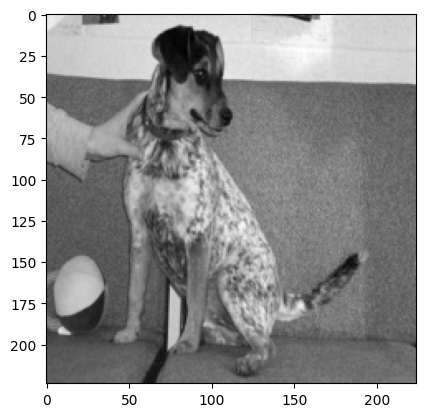

(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step
The image is predicted to be a dog.


In [8]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tkinter import filedialog
import tkinter as tk

# Function to open file dialog and get file path
def get_file_path():
    root = tk.Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename()
    return file_path

# Process two images
for i in range(2):
    # Get file path from user
    file_path = get_file_path()
    
    # Read the image using PIL
    image = Image.open(file_path).convert('L')
    
    # Resize the image to the desired shape
    resized_image = image.resize((224, 224))
    
    # Display the resized image
    plt.imshow(resized_image, cmap='gray')
    plt.show()

    # Convert grayscale image to RGB
    image_rgb = resized_image.convert('RGB')

    # Convert PIL image to numpy array and expand dimensions
    new_image = np.expand_dims(np.array(image_rgb), axis=0)
    new_image = preprocess_input(new_image)
    print(new_image.shape)

    # Extract features using VGG16
    features = vgg_model.predict(new_image)
    features = features.flatten()

    # Make prediction with SVM model
    svm_predict = svm.predict([features])

    # Print the prediction
    if svm_predict[0] == 1:
        print('The image is predicted to be a dog.')
    else:
        print('The image is predicted to be a cat.')
